In [1]:
# coding:utf-8
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

from mydatools.plot import plot_classifier_paras

%matplotlib inline
sns.set_style({'font.sans-serif':['simhei','Arial']})
sns.set_style('white')

## k近邻实现

In [2]:
def getDist(a, b):
    return np.sqrt(np.power(a - b, 2).sum(axis=1))

class kNN(object):
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)

    def predict(self, X_pred):
        y_pred = np.array([])
        for xi_pred in X_pred:
            # 获取距离
            dist = getDist(np.tile(xi_pred, (self.X.shape[0], 1)), self.X)
            # 对距离排序
            sortDistIdx = dist.argsort()
            # 按距离排序的label
            sortDistlabel = self.y[sortDistIdx]
            # 获取最近k个点 最多的分类
            yi_pred = Counter(sortDistlabel[:self.k]).most_common()[0][0]
            y_pred = np.append(y_pred, [yi_pred], axis=0)
        return y_pred.astype(self.y.dtype)

## 查看效果

* 预测效果展示

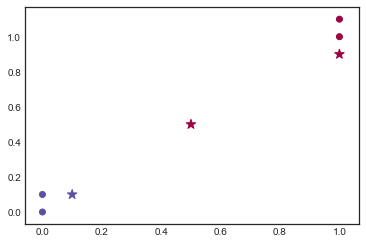

In [3]:
X_train = np.array([[1.0, 1.1], [1.0, 1.0], [0.0, 0.1],[0.0, 0.0]])
y_train = np.array([1,1,2,2])
X_pred = np.array([[1.0,0.9], [0.1,0.1], [0.5,0.5]])

model = kNN(2)
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
plt.scatter(X_pred[:, 0], X_pred[:, 1], c=y_pred, cmap=plt.cm.Spectral, s=100, marker='*')

* 月亮数据集

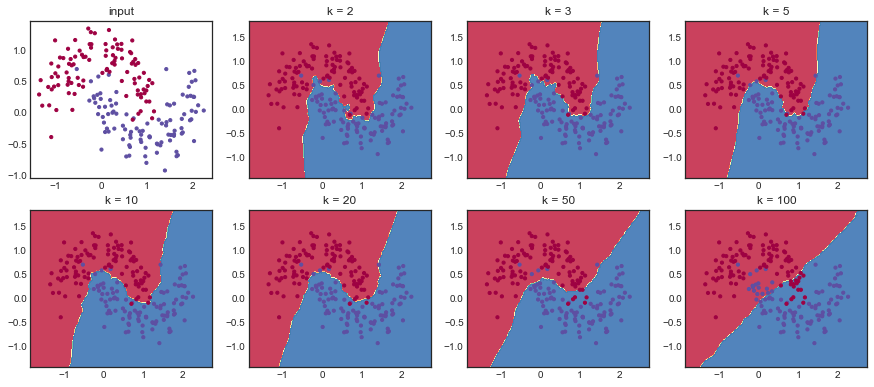

In [4]:
np.random.seed(0)
X_train, y_train = datasets.make_moons(200, noise=0.20)
plot_classifier_paras(kNN, X_train, y_train, {'k':[2,3,5,10,20,50,100]})

* 鸢尾花数据集

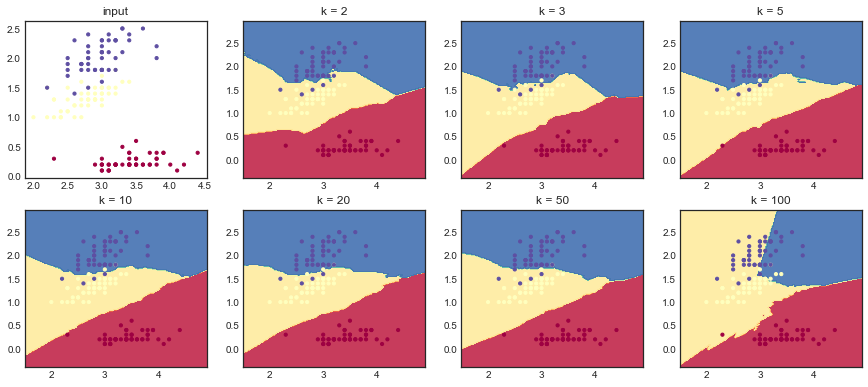

In [5]:
iris = datasets.load_iris()
X_train = iris.data[:, [1,3]]
y_train = iris.target
plot_classifier_paras(kNN, X_train, y_train, {'k':[2,3,5,10,20,50,100]})